# Local ToE

- In this version I have added in the other tests (KS, Anerson Darling)

In [1]:
# Standard Library Imports
import os
import sys
from importlib import reload
from functools import partial
from itertools import groupby

# Third-Party Library Imports
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors
import cartopy.crs as ccrs

from numpy.
# My imports
import os, sys
sys.path.append(os.path.join(os.getcwd(), 'Documents', 'PhD'))
import constants
sys.path.append(constants.MODULE_DIR)
               
import utils
import signal_to_noise as sn
import plotting_functions
import xarray_extender as xe
import stats
import time_of_emrgence_calc as toe
# Suppress Warnings
import warnings
warnings.filterwarnings('ignore')

Matplotlib created a temporary config/cache directory at /jobfs/111866954.gadi-pbs/matplotlib-41p3vh1a because the default path (/home/563/ab2313/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.
Matplotlib is building the font cache; this may take a moment.


In [2]:
from dask.distributed import Client
client = Client(threads_per_worker=1)
# Scale the client to have n workers workers
client.cluster.scale(6)
client

- State start
-   Scheduler at:     tcp://127.0.0.1:43839
-   dashboard at:         /proxy/8787/status
- Registering Worker plugin shuffle
-         Start Nanny at: 'tcp://127.0.0.1:36785'
-         Start Nanny at: 'tcp://127.0.0.1:33787'
-         Start Nanny at: 'tcp://127.0.0.1:38453'
-         Start Nanny at: 'tcp://127.0.0.1:37171'
-         Start Nanny at: 'tcp://127.0.0.1:43911'
-         Start Nanny at: 'tcp://127.0.0.1:46013'
-         Start Nanny at: 'tcp://127.0.0.1:39795'
-         Start Nanny at: 'tcp://127.0.0.1:44661'
-         Start Nanny at: 'tcp://127.0.0.1:35253'
-         Start Nanny at: 'tcp://127.0.0.1:37903'
-         Start Nanny at: 'tcp://127.0.0.1:45305'
-         Start Nanny at: 'tcp://127.0.0.1:38579'
-         Start Nanny at: 'tcp://127.0.0.1:34463'
-         Start Nanny at: 'tcp://127.0.0.1:38867'
-         Start Nanny at: 'tcp://127.0.0.1:39135'
-         Start Nanny at: 'tcp://127.0.0.1:45077'
-         Start Nanny at: 'tcp://127.0.0.1:45357'
-         S

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 28
Total threads: 28,Total memory: 251.18 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:43839,Workers: 28
Dashboard: /proxy/8787/status,Total threads: 28
Started: Just now,Total memory: 251.18 GiB
Comm: tcp://127.0.0.1:41985,Total threads: 1
Dashboard: /proxy/34727/status,Memory: 8.97 GiB
Nanny: tcp://127.0.0.1:36785,


- Closing Nanny at 'tcp://127.0.0.1:33245'. Reason: nanny-close
- Nanny asking worker to close. Reason: nanny-close
- Closing Nanny at 'tcp://127.0.0.1:45915'. Reason: nanny-close
- Nanny asking worker to close. Reason: nanny-close
- Closing Nanny at 'tcp://127.0.0.1:42917'. Reason: nanny-close


In [3]:
xr.set_options(display_expand_attrs=False)
xr.set_options(display_expand_data=True)
np.set_printoptions(precision=2, suppress=True, edgeitems=1)

- Nanny asking worker to close. Reason: nanny-close


# Opening Best

In [4]:
ROOT_DIR = '/g/data/w40/ab2313/PhD/time_of_emergence'

os.listdir(os.path.join(ROOT_DIR, 'best'))

- Received 'close-stream' from tcp://127.0.0.1:60942; closing.
- Received 'close-stream' from tcp://127.0.0.1:60926; closing.
- Received 'close-stream' from tcp://127.0.0.1:60992; closing.
- Received 'close-stream' from tcp://127.0.0.1:60820; closing.
- Received 'close-stream' from tcp://127.0.0.1:60910; closing.
- Received 'close-stream' from tcp://127.0.0.1:60928; closing.
- Received 'close-stream' from tcp://127.0.0.1:60898; closing.
- Received 'close-stream' from tcp://127.0.0.1:60800; closing.
- Received 'close-stream' from tcp://127.0.0.1:60944; closing.
- Received 'close-stream' from tcp://127.0.0.1:60798; closing.
- Received 'close-stream' from tcp://127.0.0.1:60856; closing.
- Received 'close-stream' from tcp://127.0.0.1:32774; closing.
- Received 'close-stream' from tcp://127.0.0.1:60836; closing.
- Received 'close-stream' from tcp://127.0.0.1:60884; closing.
- Received 'close-stream' from tcp://127.0.0.1:60794; closing.
- Received 'close-stream' from tcp://127.0.0.1:60980; c

['Land_and_Ocean_LatLong1.zarr',
 'Land_and_Ocean_LatLong1.nc',
 '.ipynb_checkpoints']

- Received 'close-stream' from tcp://127.0.0.1:60916; closing.


In [5]:
best_ds = xr.open_dataset(os.path.join(ROOT_DIR, 'best', 'Land_and_Ocean_LatLong1.zarr'), 
                    chunks={'time':-1, 'latitude': 90, 'longitude': 120},
                    use_cftime=True)['temperature']

best_ds = best_ds.rename({'latitude':'lat', 'longitude': 'lon'})
best_ds['time'] = xr.cftime_range(start='1850-01-01', freq='M', periods=len(best_ds.time.values))
best_ds = best_ds.resample(time='Y').mean()

- Remove worker <WorkerState 'tcp://127.0.0.1:45871', name: 6, status: closing, memory: 0, processing: 0> (stimulus_id='handle-worker-cleanup-1711496902.974152')
- Remove worker <WorkerState 'tcp://127.0.0.1:46371', name: 7, status: closing, memory: 0, processing: 0> (stimulus_id='handle-worker-cleanup-1711496902.9784026')
- Remove worker <WorkerState 'tcp://127.0.0.1:44137', name: 8, status: closing, memory: 0, processing: 0> (stimulus_id='handle-worker-cleanup-1711496902.980697')
- Remove worker <WorkerState 'tcp://127.0.0.1:35721', name: 9, status: closing, memory: 0, processing: 0> (stimulus_id='handle-worker-cleanup-1711496902.9829895')
- Remove worker <WorkerState 'tcp://127.0.0.1:34717', name: 10, status: closing, memory: 0, processing: 0> (stimulus_id='handle-worker-cleanup-1711496902.9854965')
- Remove worker <WorkerState 'tcp://127.0.0.1:44319', name: 11, status: closing, memory: 0, processing: 0> (stimulus_id='handle-worker-cleanup-1711496902.988284')
- Remove worker <Worker

In [6]:
# Only 43MB - load into memory
best_ds = best_ds.compute()

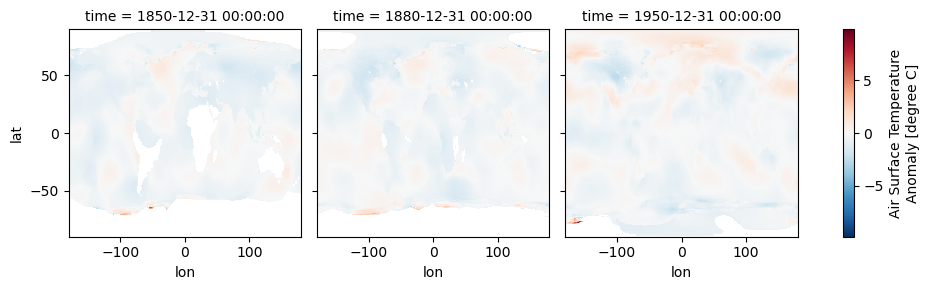

In [7]:
best_ds.isel(time=[0, 30, 100]).plot(col='time')

In [8]:
# Create a data set for the base period used as the pre-industrial climate 
start_end_tuple = (1850, 1900)#(1900, 1931)

base_period_ds = best_ds.where(best_ds.time.dt.year.isin(np.arange(*start_end_tuple)), drop=True)
base_period_ds

<xarray.DataArray 'temperature' (time: 50, lat: 180, lon: 360)>
array([[[  nan, ...,   nan],
        ...,
        [  nan, ...,   nan]],

       ...,

       [[  nan, ...,   nan],
        ...,
        [-0.03, ..., -0.03]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * time     (time) object 1850-12-31 00:00:00 ... 1899-12-31 00:00:00
Attributes: (5)

In [9]:
best_ds = best_ds - base_period_ds.mean(dim='time')

In [10]:
base_period_ds_count = base_period_ds.count(dim='time')

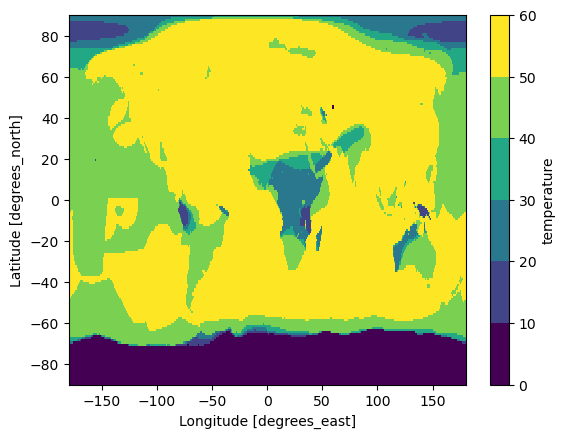

In [11]:
data_availability_levels = np.arange(0, 61, 10)

base_period_ds_count.plot(levels=data_availability_levels)

In [12]:
# Create a mask that removes any grid celss where there are less than 40 point in the base period
data_availability_mask = xr.where(base_period_ds_count>=40, 1, 0)
data_availability_mask

<xarray.DataArray 'temperature' (lat: 180, lon: 360)>
array([[0, ..., 0],
       ...,
       [0, ..., 0]])
Coordinates:
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5

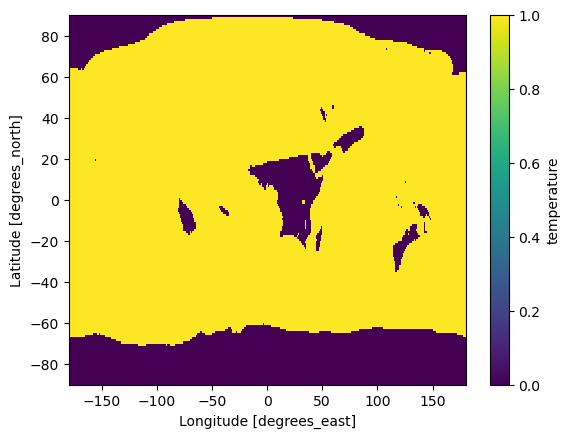

In [13]:
data_availability_mask.plot()

In [14]:
# Apply the mask to both the base period and the full dataset
best_ds = best_ds.where(data_availability_mask)

base_period_ds = base_period_ds.where(data_availability_mask)

# Calculations

In [11]:
window = 20

## Signal-to-Noise

### Trend Fit

In [16]:
# best_ds_no_base = best_ds.sel(time=best_ds.time.dt.year>1900)
# best_ds_no_base

In [17]:
import statsmodels.api as sm 
lowess = sm.nonparametric.lowess

In [18]:
def apply_lowess(arr):
    if all(np.isnan(arr)): return arr

    x = np.arange(arr.shape[0])
    yhat = lowess(arr,x, return_sorted=False)
    return yhat

In [19]:
best_ds_smean = best_ds.clima.space_mean()#.plot()
best_ds_smean

<xarray.DataArray 'temperature' (time: 175)>
array([-0.08, -0.01,  0.04,  0.02,  0.01,  0.03, -0.09, -0.21, -0.04,
        0.08, -0.07, -0.15, -0.22, -0.07, -0.02,  0.06,  0.1 ,  0.12,
        0.11,  0.04,  0.01, -0.01,  0.02,  0.05, -0.03, -0.02, -0.04,
        0.33,  0.4 ,  0.09,  0.02,  0.13,  0.07,  0.01, -0.15, -0.12,
       -0.15, -0.18,  0.01,  0.14, -0.15, -0.01, -0.09, -0.07, -0.06,
        0.  ,  0.1 ,  0.1 , -0.1 ,  0.06,  0.17,  0.09, -0.07, -0.17,
       -0.22, -0.04,  0.04, -0.12, -0.16, -0.22, -0.18, -0.19, -0.11,
       -0.09,  0.09,  0.15, -0.08, -0.23, -0.06, -0.01,  0.07,  0.12,
        0.02,  0.06,  0.05,  0.09,  0.23,  0.11,  0.12, -0.05,  0.17,
        0.22,  0.18, -0.01,  0.14,  0.08,  0.15,  0.3 ,  0.31,  0.29,
        0.38,  0.33,  0.35,  0.4 ,  0.51,  0.36,  0.21,  0.27,  0.18,
        0.19,  0.11,  0.28,  0.36,  0.43,  0.24,  0.16,  0.08,  0.31,
        0.35,  0.31,  0.28,  0.32,  0.3 ,  0.32,  0.06,  0.17,  0.23,
        0.25,  0.19,  0.33,  0.27,  0.15,  0.26,  0.41,  0.18,  0.26,
        0.17,  0.5 ,  0.37,  0.47,  0.55,  0.62,  0.42,  0.6 ,  0.4 ,
        0.42,  0.47,  0.61,  0.63,  0.54,  0.72,  0.69,  0.5 ,  0.58,
        0.63,  0.78,  0.63,  0.82,  0.96,  0.72,  0.71,  0.85,  0.92,
        0.92,  0.84,  0.99,  0.95,  0.94,  0.83,  0.95,  1.05,  0.91,
        0.96,  0.96,  1.05,  1.22,  1.33,  1.23,  1.13,  1.28,  1.31,
        1.17,  1.19,  1.5 ,  1.64], dtype=float32)
Coordinates:
  * time     (time) object 1850-12-31 00:00:00 ... 2024-12-31 00:00:00

In [20]:
best_ds_smean_lowess = xr.zeros_like(best_ds_smean) + apply_lowess(best_ds_smean.values)

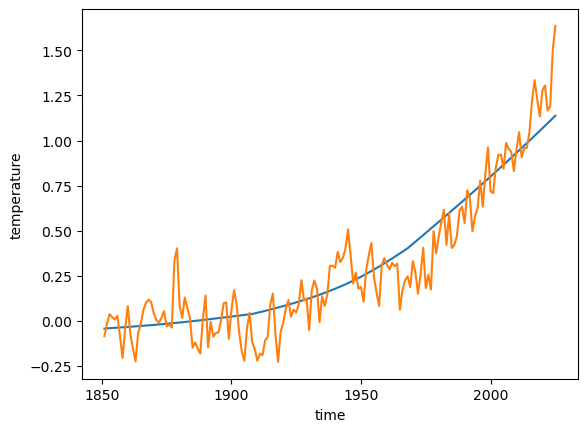

In [21]:
best_ds_smean_lowess.plot()
best_ds_smean.plot()

In [42]:
np.all(np.isnan([np.nan]))

True

In [72]:
def return_hawkins_signal_and_noise(lt:ArrayLike, gt:ArrayLike) -> tuple[ArrayLike, ArrayLike]:

    if np.all(np.isnan(lt)) or np.all(np.isnan(gt)): return lt, lt
    
    # Remove nan's from both time series
    # non_nan_locs = np.isfinite(gt) & np.isfinite(lt)
    # gt = gt[non_nan_locs]
    # lt = lt[non_nan_locs]
    number_nans_at_start = np.where(~np.isnan(lt))[0][0]
    number_nans_at_end = np.where(~np.isnan(lt[::-1]))[0][0] # This is done same as above,just invet first

    # Remove start nans (this can be zero and doesn't break)
    lt = lt[number_nans_at_start:] 
    gt = gt[number_nans_at_start:]
    if number_nans_at_end > 0:# If number_nans_at_end is then this removes all values
        lt = lt[:-number_nans_at_end] 
        gt = gt[:-number_nans_at_end] 

    # Calcualte gra
    grad, yint = np.polyfit(gt, lt, deg=1)
    signal = grad * gt
    #noise = np.std(lt - grad * gt)
    noise = np.std(lt - grad * gt)

    retu
    #noise = np.concatenate([[np.nan]*number_nans_at_start, noise, [np.nan] *number_nans_at_end])
    #signal = np.concatenate([[np.nan]*number_nans_at_start, signal, [np.nan] *number_nans_at_end])
    
    #return signal, noise

In [76]:
reload(toe)

<module 'time_of_emrgence_calc' from '/home/563/ab2313/Documents/PhD/modules/time_of_emrgence_calc.py'>

In [77]:
return_hawkins_signal_and_noise_partial = partial(toe.return_hawkins_signal_and_noise, gt=best_ds_smean_lowess.values)

In [78]:
ds_best_signal, ds_best_noise_series = xr.apply_ufunc(
    return_hawkins_signal_and_noise_partial,
    best_ds,
    input_core_dims=[['time']], 
    output_core_dims=[['time'], ['time']], 
    dask='parallelized', 
    vectorize=True
)

- Connection to tcp://127.0.0.1:37530 has been closed.
- Remove worker <WorkerState 'tcp://127.0.0.1:42637', name: 4, status: running, memory: 0, processing: 0> (stimulus_id='handle-worker-cleanup-1711505039.897546')
- Worker process 722138 was killed by signal 15
- Worker process 722131 was killed by signal 15
- Worker process 722126 was killed by signal 15
- Worker process 722142 was killed by signal 15
- Worker process 722135 was killed by signal 15
- Worker process 722122 was killed by signal 15
- Connection to tcp://127.0.0.1:37512 has been closed.
- Remove worker <WorkerState 'tcp://127.0.0.1:41839', name: 0, status: running, memory: 0, processing: 0> (stimulus_id='handle-worker-cleanup-1711505039.9227922')
- Connection to tcp://127.0.0.1:37542 has been closed.
- Remove worker <WorkerState 'tcp://127.0.0.1:32987', name: 3, status: running, memory: 0, processing: 0> (stimulus_id='handle-worker-cleanup-1711505039.9251084')
- Connection to tcp://127.0.0.1:37558 has been closed.
- Re

In [61]:
ds_best_noise = ds_best_noise_series.std(dim='time')

In [66]:
ds_best_sn = ds_best_signal/ds_best_noise

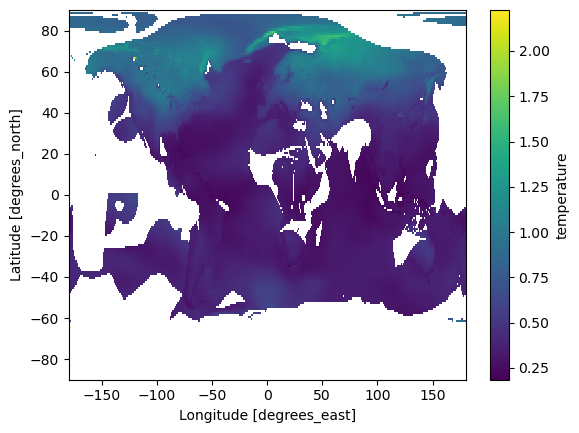

In [62]:
ds_best_noise.plot()

In [63]:
sel_dict = dict(lat=-38, lon=144, method='nearest')

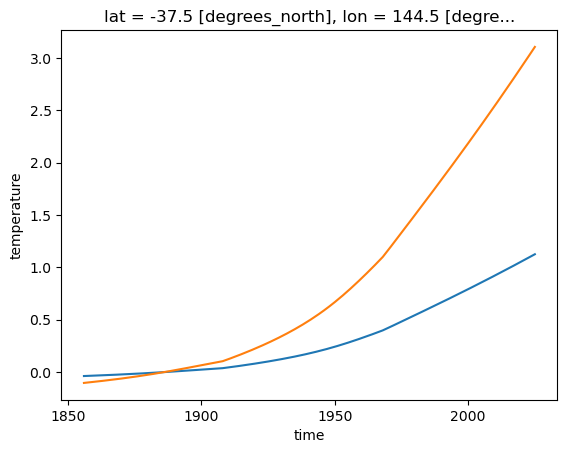

- full garbage collection released 23.20 MiB from 9408 reference cycles (threshold: 9.54 MiB)


In [67]:
ds_best_signal.sel(**sel_dict).plot()
ds_best_sn.sel(**sel_dict).plot()

In [22]:
lt = best_ds.sel(lat=-38, lon=144, method='nearest').values

In [23]:
gt = best_ds_smean_lowess.values

In [24]:
non_nan_locs = np.isfinite(gt) & np.isfinite(lt)

In [25]:
gt = gt[non_nan_locs]
lt = lt[non_nan_locs]

In [26]:
grad, yint = np.polyfit(gt, lt, deg=1)

In [118]:
lt_out = grad * gt + yint

In [119]:
signal = grad * gt

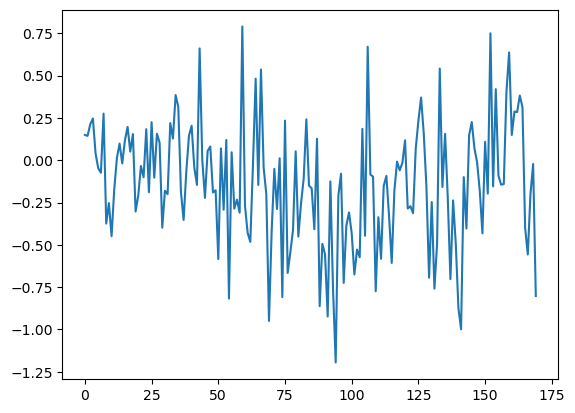

In [123]:
plt.plot(lt - grad * gt)

In [124]:
noise = np.std(lt - grad * gt)
noise

0.3627804004131642

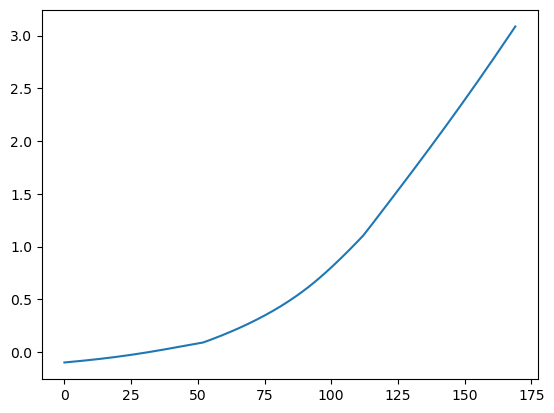

In [125]:
plt.plot(signal/noise)

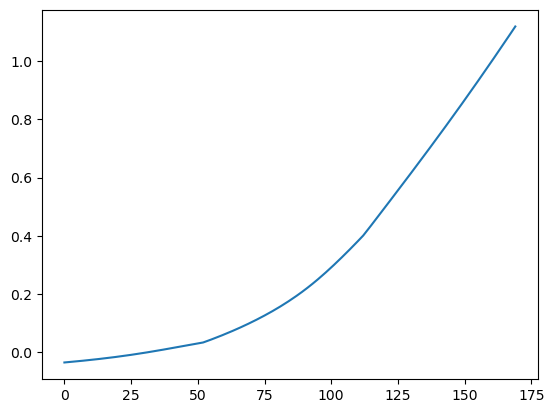

In [120]:
plt.plot(signal)

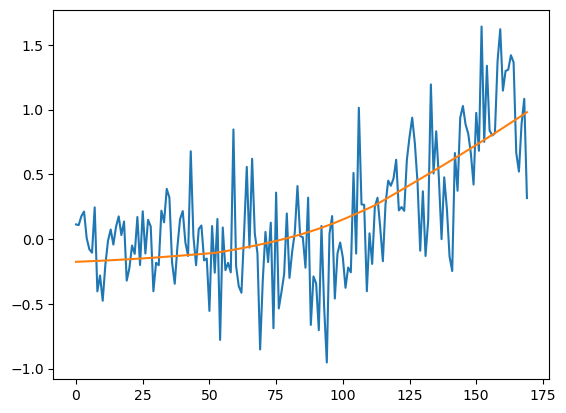

In [122]:
plt.plot(lt)
plt.plot(lt_out)

In [50]:
polynomial_fit_global_mean = partial(stats.polynomial_fit, x=best_ds_smean_lowess.values, order=1)

In [51]:
best_ds = best_ds.chunk({'time':-1, 'lat':60, 'lon':-1})

In [65]:
ds_best_signal = xr.apply_ufunc(
    polynomial_fit_global_mean,
    best_ds,
    input_core_dims=[['time']], 
    output_core_dims=[['time']], 
    dask='parallelized', 
    vectorize=True
)

In [66]:
ds_best_signal = signal_ds.compute()

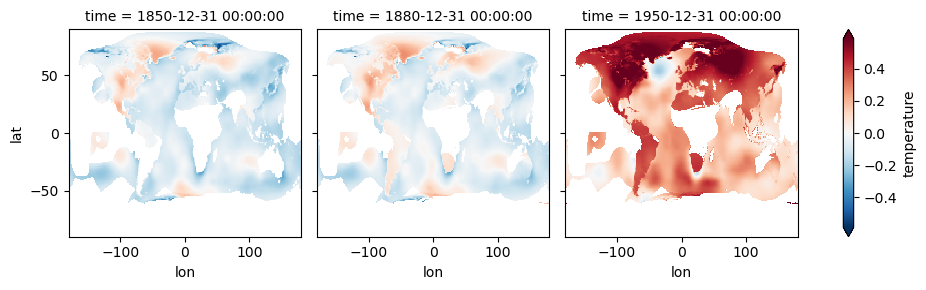

In [67]:
ds_best_signal.isel(time=[0, 30, 100]).plot(col='time', robust=True)

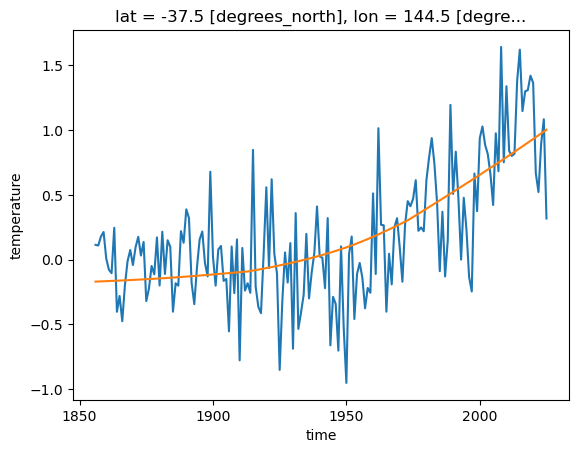

In [68]:
best_ds.sel(lat=-38, lon=144, method='nearest').plot()
signal_ds.sel(lat=-38, lon=144, method='nearest').plot()

In [69]:
noise_ds = base_period_ds.std(dim='time')

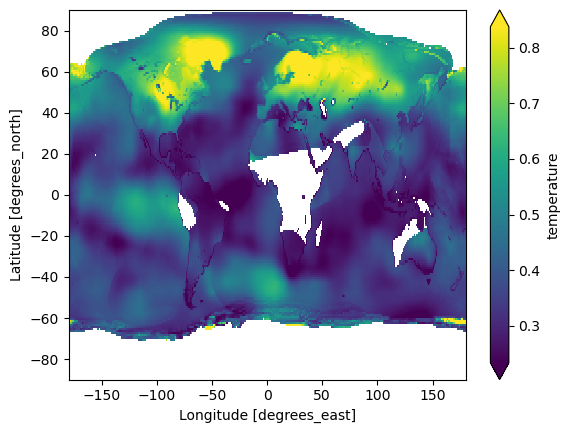

In [70]:
noise_ds.plot(robust=True)

In [71]:
base_period_ds_average = base_period_ds.mean(dim='time').fillna(0)
base_period_ds_average

<xarray.DataArray 'temperature' (lat: 180, lon: 360)>
array([[0., ..., 0.],
       ...,
       [0., ..., 0.]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5

In [72]:
ds_best_sn = ds_best_signal/noise_ds

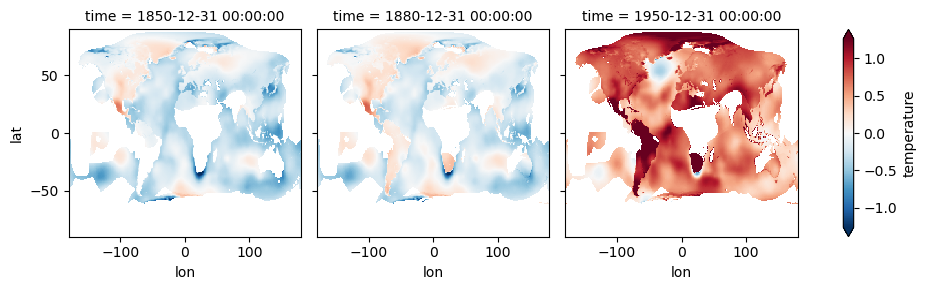

In [73]:
ds_best_sn.isel(time=[0, 30, 100]).plot(col='time', robust=True)